## MOBILENET IMPLEMENTATION

In [355]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [356]:
img_array = cv2.imread(r"C:\Users\livit\OneDrive\Desktop\Dataset\with_mask\118.png")

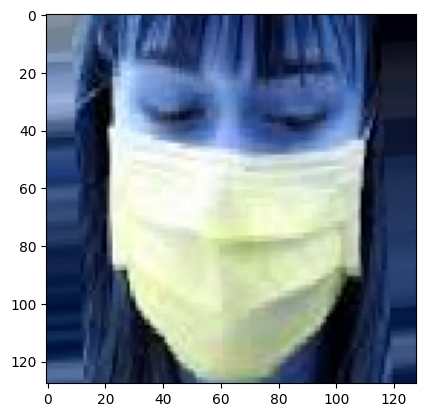

In [357]:
plt.imshow(img_array)

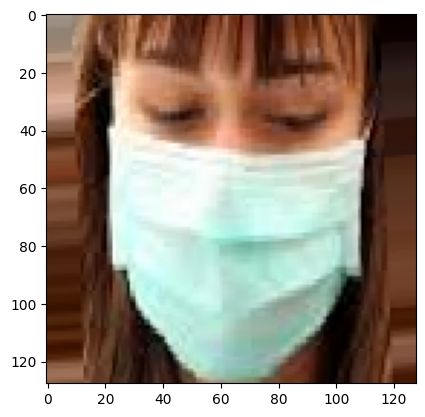

In [358]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [359]:
img_array.shape

(128, 128, 3)

In [360]:
img_array = cv2.imread(r"C:\Users\livit\OneDrive\Desktop\Dataset\without_mask\115.png")

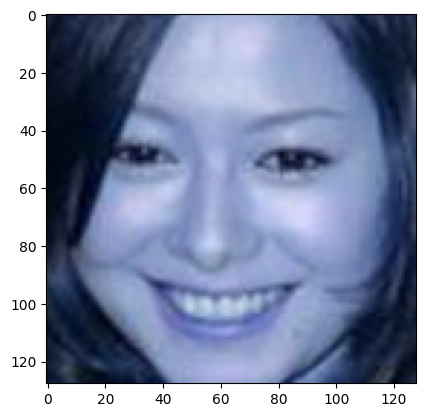

In [361]:
plt.imshow(img_array)

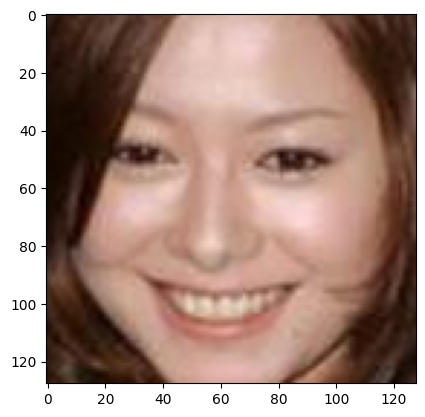

In [362]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [363]:
img_array.shape

(128, 128, 3)

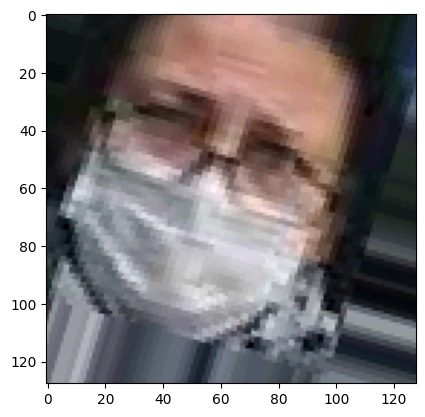

In [364]:
Datadirectory = ("C:/Users/livit/OneDrive/Desktop/Dataset")
Classes = ["with_mask", "without_mask"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

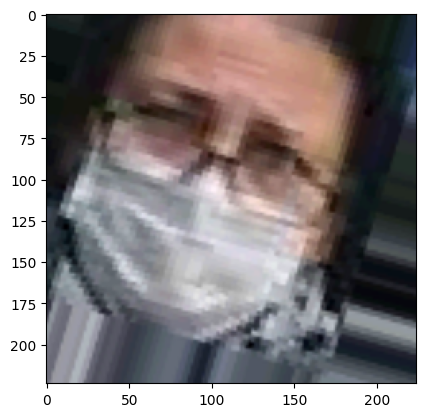

In [365]:
img_size= 224
new_array= cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

# Reading the images and converting all to array

In [366]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [367]:
create_training_Data()

In [368]:
print(len(training_Data))

4600


In [369]:
import random
random.shuffle(training_Data)

In [370]:
X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [371]:
X.shape

(4600, 224, 224, 3)

In [372]:
y[1000]

1

In [373]:
Y= np.array(y)

In [374]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [375]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# Deep Learning Model for Training - Transfer Learning

In [376]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [377]:
model = tf.keras.applications.mobilenet.MobileNet()

In [378]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Transfer Learning - Tuning, weights will start from last check point

In [379]:
base_input = model.layers[1].input

In [380]:
base_output= model.layers[-4].output

In [381]:
Flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

In [382]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [383]:
new_model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Settings for Binary Classification (Face Mask/Without Mask)

In [384]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
new_model.fit(X,Y, epochs =50,validation_split = 0.1)

Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 475s 3s/step - accuracy: 0.8502 - loss: 2.2575 - val_accuracy: 0.5370 - val_loss: 7.4621
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 417s 3s/step - accuracy: 0.8193 - loss: 2.7911 - val_accuracy: 0.4391 - val_loss: 8.9687
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 432s 3s/step - accuracy: 0.7177 - loss: 4.2335 - val_accuracy: 0.8870 - val_loss: 1.6849
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 433s 3s/step - accuracy: 0.7964 - loss: 3.0782 - val_accuracy: 0.8913 - val_loss: 1.7538
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 403s 3s/step - accuracy: 0.9070 - loss: 1.1503 - val_accuracy: 0.8891 - val_loss: 1.3530
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 391s 3s/step - accuracy: 0.9346 - loss: 0.7807 - val_accuracy: 0.4870 - val_loss: 7.5706
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 365s 3s/step - accuracy: 0.8560 - loss: 1.5192 - val_accuracy: 0.9217 - val_loss: 1.1235
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 386s 3s/step - accuracy: 0.9480 - loss: 0.5238 - val_accu

In [385]:
new_model.save('my_model.keras')

In [386]:
new_model = tf.keras.models.load_model('my_model.keras')

# Checking the network for Predictions

In [387]:
frame = cv2.imread(r"C:\Users\livit\OneDrive\Desktop\Dataset\with_mask\118.png")

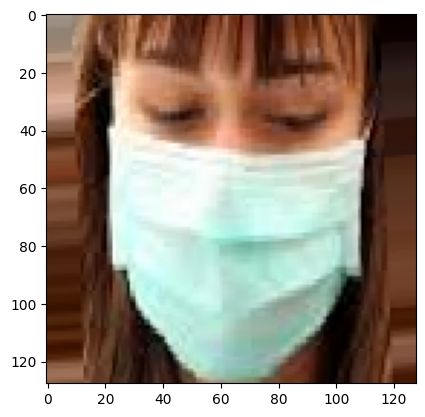

In [388]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [389]:
final_image = cv2.resize(frame, (244,244))
final_image = np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [390]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
img_path=r"C:\Users\livit\OneDrive\Desktop\Dataset\with_mask\118.png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)  
img_array = img_array.reshape((1, 224, 224, 3))
Predictions =new_model.predict(img_array)
Predictions = new_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [391]:
Predictions

array([[2.84854]], dtype=float32)

In [392]:
frame = cv2.imread(r"C:\Users\livit\OneDrive\Desktop\Dataset\without_mask\115.png")

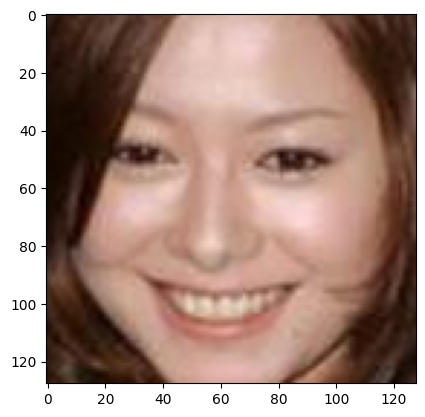

In [393]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [394]:
final_image = cv2.resize(frame, (244,244))
final_image = np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [395]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
img_path=r"C:\Users\livit\OneDrive\Desktop\Dataset\with_mask\118.png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array) 
img_array = img_array.reshape((1, 224, 224, 3))
Predictions =new_model.predict(img_array)
Predictions = new_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [396]:
Predictions

array([[2.84854]], dtype=float32)

# Checking the network for unknown images

In [397]:
frame = cv2.imread(r"C:\Users\livit\OneDrive\Desktop\Dataset\sad_women.jpeg")

In [398]:
frame.shape

(224, 225, 3)

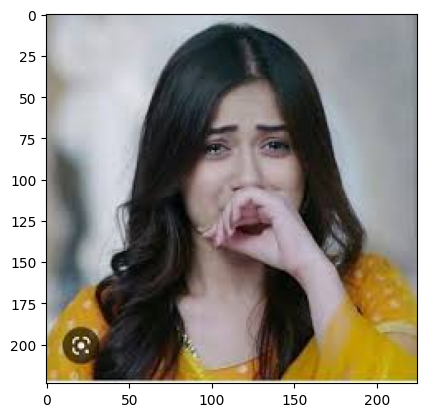

In [399]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [400]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [401]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [402]:
gray.shape

(224, 225)

In [403]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

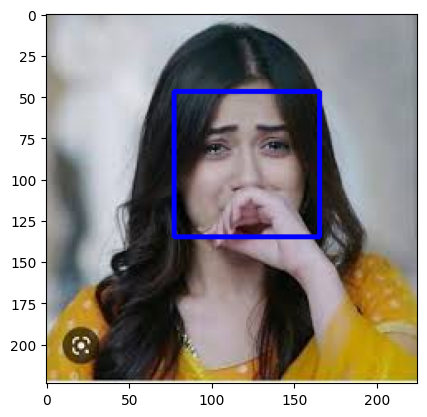

In [404]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

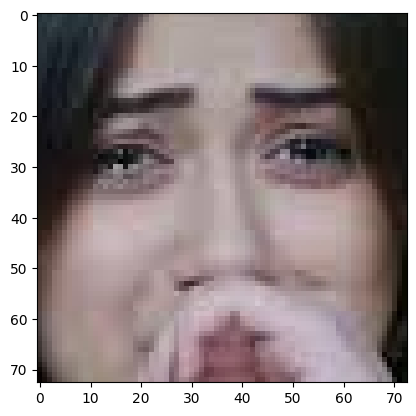

In [405]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [406]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [407]:
Predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [408]:
Predictions

array([[2.8484278]], dtype=float32)

In [409]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array 
from PIL import Image
img_path=r"C:\Users\livit\OneDrive\Desktop\Dataset\with_mask\121.png"
img= image.load_img(img_path, target_size=(224, 224))
X = image.img_to_array(img)
X = np.expand_dims (X, axis=0)
X = preprocess_input(X)
model = MobileNetV2(weights='imagenet')
dummy_input = tf.random.normal(shape=(1, 224, 224, 3))
_ = model (dummy_input)
import time
start_time = time.time()
for _ in range(10):
    predictions = model.predict(X)
end_time=time.time()
average_inference_time = (end_time - start_time) / 10
print (f"Average inference time for MobileNetV2: {average_inference_time:.2f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Average inference time for MobileNetV2: 1.04 seconds


# Realtime Video Demo

# Face Mask Dtection

In [411]:
import cv2
import numpy as np
import tensorflow as tf
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
new_model = tf.keras.models.load_model(r"C:\Users\livit\OneDrive\Desktop\Dataset\my_model.keras")
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4) 
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        face_roi = cv2.resize(roi_color, (224, 224)) 
        final_image = face_roi / 255.0
        final_image = np.expand_dims(final_image, axis=0)
        Predictions = new_model.predict(final_image)
        if Predictions[0][0] < 0.5: 
            status = "Face Mask"
            color = (0, 255, 0)
        else:
            status = "No Mask"
            color = (0, 0, 255)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, status, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
    cv2.imshow('Face Mask Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━